In [2]:
import pandas as pd
import sys; sys.path
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
import sys
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame
from geopandas.tools import sjoin, overlay
from datetime import datetime, date, time
import os
BEGIN = dt.datetime(2020, 8, 23)
STOPS_BUFFER=0.0005
START_TRIP_DISTANCE_PRODUCT=0.0001
#%matplotlib linline

ModuleNotFoundError: No module named 'descartes'

In [22]:
###УБЕРАЕМ ИЗ ТАБЛИЦЫ 7 ЛИШНИЕ МАРШРУТЫ (КОТОРЫХ НЕТ В ТРЭКАХ)
path = '.\\data\\'
stops = pd.read_csv(path+'stop_seq.csv', sep = ';', encoding='utf-8')

In [23]:
table7.head()

,mr_id,rc_id,rl_id,ssId,rc_orderby,ss_lat,ss_long,is_main,Dir
0,17,7596601,75966,2079,1,53.185644,50.099016,1,0
1,17,7596602,75966,1159,2,53.186512,50.098602,1,0
2,17,7596603,75966,349,3,53.189191,50.102945,1,0
3,17,7596604,75966,350,4,53.191903,50.104823,1,0
4,17,7596605,75966,351,5,53.197004,50.108299,1,0


In [24]:
geometry = [Point(xy).buffer(STOPS_BUFFER) for xy in zip(stops['ss_long'], stops['ss_lat'])]         
crs = {'init': 'epsg:4326'}
stops_gpd = gpd.GeoDataFrame(stops, crs=crs, geometry=geometry).drop(['ss_long', 'ss_lat'], axis=1)
#-!!!-Без диссолва тоже работает, но не понятно как быстрее
stops_gpd=stops_gpd.dissolve(by='mr_id')

C:\Users\makol\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


C:\Users\makol\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


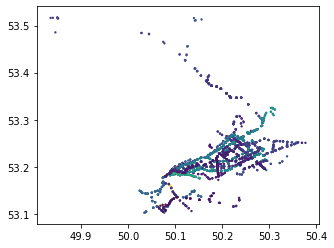

In [26]:
        ### ТУТ ПОБОЛЬШЕ РАДИУС КРУЖКОВ ВОКРУГ ОСТАНОВОК ЧТОБЫ РИСОВАТЬ И БЫЛО ВИДНО
        geometry = [Point(xy).buffer(5*STOPS_BUFFER) for xy in zip(stops['ss_long'], stops['ss_lat'])]         
        stops_gpd_DLYA_RISOVANIYA = gpd.GeoDataFrame(stops, crs=crs, geometry=geometry).drop(['ss_long', 'ss_lat'], axis=1)         
        stops_gpd_DLYA_RISOVANIYA.plot(column='mr_id')

In [27]:
files = [f for f in os.listdir(path) if "_4.csv" in f]

In [28]:
files

['2020-08-03_s2_4.csv',
 '2020-08-03_s3_4.csv',
 '2020-08-03_s5_4.csv',
 '2020-08-03_s6_4.csv',
 '2020-08-03_s7_4.csv']

In [30]:
tracks=pd.DataFrame()
for file in files:
    m = pd.read_csv(path+file, sep = '\t', encoding='windows-1251')
    tracks=tracks.append(m,ignore_index=True)
    del m

C:\Users\makol\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
tracks.head()

,tr_id,mr_id,mr_name,graph,tabelnum,condnum,timenav,long,lat,speed,mark
0,200000005,105,48д,16,0,0,2020-08-03 08:08:35,50.105748,53.183607,0,0
1,200000005,105,48д,16,0,0,2020-08-03 08:09:08,50.107532,53.185437,0,0
2,200000005,105,48д,16,0,0,2020-08-03 08:09:35,50.109833,53.187788,0,0
3,200000005,105,48д,16,0,0,2020-08-03 08:10:07,50.111470,53.188135,0,0
4,200000005,105,48д,16,0,0,2020-08-03 08:10:36,50.114563,53.187878,0,0


In [ ]:
geometry = [Point(xy) for xy in zip(tracks['long'], tracks['lat'])] 
crs = {'init': 'epsg:4326'}
tracks_gpd = gpd.GeoDataFrame(tracks, crs=crs, geometry=geometry).drop(['long', 'lat'], axis=1)
tracks_gpd.plot(markersize=1,column='mr_id')

In [1]:
#-!!!-C диссолвом
tracks_gpd=tracks_gpd.groupby('mr_id').apply( lambda track_: 
    gpd.sjoin(track_, 
        gpd.GeoDataFrame(stops_gpd[stops_gpd.index==track_.name],
                crs=crs, 
                geometry='geometry'), 
        op='within').rename(columns={"mr_id_left":"mr_id"}).drop(columns=['index_right'])) 
tracks_gpd=tracks_gpd[~tracks_gpd.index.duplicated(keep='first')].sort_index()
tracks_gpd.plot(markersize=1,column='mr_id')
#-!!!-C диссолвом

NameError: name 'tracks_gpd' is not defined